In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import tensorflow as tf

# 讀入 Fashion MNIST 數據集

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


# 欣賞數據集內容

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

這個東西是: Shirt


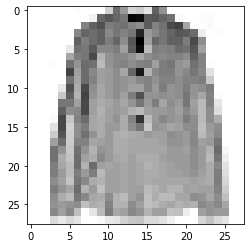

In [6]:
n = 3642
print("這個東西是: "+class_names[y_train[n]])
plt.imshow(x_train[n], cmap="Greys");

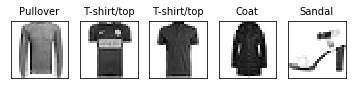

In [7]:
pick = np.random.choice(60000, 5, replace=False)
for i in range(5):
  n = pick[i]
  ax = plt.subplot(151+i)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(class_names[y_train[n]], fontsize=10)
  plt.imshow(x_train[n], cmap="Greys")

# 資料整理

In [8]:
x_train = x_train.reshape(len(x_train), 784)/255

In [9]:
x_test = x_test.reshape(len(x_test), 784)/255

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_train = to_categorical(y_train, 10)

In [12]:
y_test = to_categorical(y_test, 10)

# 打造神經網路

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [14]:
model = Sequential()

In [15]:
model.add(Dense(324, input_dim=784, activation='relu')) #這裡用324個神經元

In [16]:
model.add(Dense(324, activation='relu'))

In [17]:
model.add(Dense(10, activation='softmax'))

# 組裝神經網路

In [18]:
model.compile(loss='mse', optimizer=SGD(lr=0.87), metrics=['accuracy']) #lr改成0.87

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 324)               254340    
_________________________________________________________________
dense_1 (Dense)              (None, 324)               105300    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3250      
Total params: 362,890
Trainable params: 362,890
Non-trainable params: 0
_________________________________________________________________


# 訓練

In [20]:
model.fit(x_train, y_train, batch_size=200, epochs=40) #batch_size改成200，epochs改成40

Train on 60000 samples
Epoch 1/40
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0419 - accuracy: 0.7132
Epoch 2/40
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0273 - accuracy: 0.8163
Epoch 3/40
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0242 - accuracy: 0.8373
Epoch 4/40
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0228 - accuracy: 0.8443
Epoch 5/40
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0215 - accuracy: 0.8540
Epoch 6/40
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0207 - accuracy: 0.8599
Epoch 7/40
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0199 - accuracy: 0.8649
Epoch 8/40
60000/60000 [==============================] - 2s 32us/sample - loss: 0.0194 - accuracy: 0.8695
Epoch 9/40
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0189 - accuracy: 0.8719
Epoch 10/40
60

# 訓練成果

In [21]:
result = model.predict_classes(x_test)

神經網路預測是:  Dress


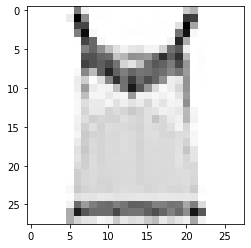

In [22]:
n = 5566
print('神經網路預測是: ', class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys')